# Question 1

a) Download the "Boston1.csv" database, and explore the data. Explanation about the dataset can be found here: http://www.clemson.edu/economics/faculty/wilson/R-tutorial/analyzing_data.html

Find the columns with missing values and filter them out of the data.

In [63]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
 
sns.set(rc={"figure.figsize": (5,5)})
sns.set_style("white")

In [64]:
boston_df = pd.read_csv("./Boston1.csv")
print boston_df.info()
del boston_df["misData"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
randCol    506 non-null float64
misData    249 non-null float64
dtypes: float64(13), int64(3)
memory usage: 63.3 KB
None


b) Divide the filtered data randomly into a train set (70% of the data) and test set (30% of the data).

In [65]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(boston_df, test_size = .3)

In [66]:
print "train", train.shape
print "test", test.shape

train (354, 15)
test (152, 15)


# Question 2

If you haven't done this previously, install the scikit-learn package for python.

a) On the train set, run a linear regression model as follows:
Divide the training set into explanatory variables (the X matrix with which we'll try to make a prediction) and a target variable (y, the value which we'll try to predict). Use the 'medv' attribute as the target variable y and the rest of the features as the X matrix. Run a linear regression model on those sets, and print the regression coefficients. 

In [67]:
y_train = train.medv
y_test = test.medv

X_train = train.copy()
del X_train["medv"]

X_test = test.copy()
del X_test["medv"]

In [68]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

print "regression coefficients:",  lr.coef_

regression coefficients: [ -1.35952177e-01   4.38369376e-02  -3.55945081e-02   3.13912277e+00
  -1.90786430e+01   3.58951211e+00   1.90901622e-03  -1.58212617e+00
   3.22478334e-01  -1.14805962e-02  -9.81494489e-01   1.00307292e-02
  -5.20599319e-01   6.78769027e-02]


b) Use the linear regression model to predict the values of the test set's 'medv' column, based on the test set's other attributes. Print the Mean Squared Error of the model on the train set and on the test set.

In [69]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test)
print "mse for linear regression predicting median_value: ", round(mean_squared_error(y_test, y_pred),2), "%"

mse for linear regression predicting median_value:  21.13 %


c) Usually, the MSE on the train set would be lower than the MSE on the test set, since the model parameters are optimized with respect to the train set. Is this the case in your output? Can you think of a reason why a regressor on a dataset would behave differently (i.e, the MSE on the test set would be smaller than on the train set)?

In [70]:
y_pred = lr.predict(X_train)
print "train mse for linear regression predicting median_value: ", round(mean_squared_error(y_train, y_pred),2), "%"

train mse for linear regression predicting median_value:  22.39 %


# this is not the case for our output, mse is higher when using the train dataset. This means that the model performs better on the test rather than the training set, meaning that we have a model that generalizes better to new data with a different distribution rather than performing accurately on the same data 

d) Add some noise (with mean=0, std=1) to the test set's y, and predict it again. What happened to the MSE? Why?
- the MSE wen't up, this is because our predictions stay the same while our test_set now has more noise, so our model doesn't generalize as well to it.

In [71]:
y_test_noise = y_test + np.random.normal(loc = 0, scale = 1, size = len(y_test))
y_pred = lr.predict(X_test)
print "test w/ noise mse for linear regression predicting median_value: ", round(mean_squared_error(y_test_noise, y_pred),2), "%"

test w/ noise mse for linear regression predicting median_value:  22.28 %


# Question 3

a) Create a Recursive feature elimination model, with a linear regression estimator, that selects half of the original number of features. Hint: Check the feature_selection module in scikit-learn.

In [72]:
from sklearn.feature_selection import RFE

In [73]:
selector = RFE(estimator = lr, n_features_to_select=7, step = 1, verbose=5)
selector.fit(X_train, y_train)
print selector.support_
print selector.ranking_

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
[False False False  True  True  True False  True  True False  True False
  True False]
[2 5 3 1 1 1 8 1 1 6 1 7 1 4]


b) Use the feature elimination model on the full database (after filtering columns with missing values, before partitioning into train/test). Print the features that were selected. Remember that we separate the 'medv' attribute to be our y, while the rest of the attributes in the dataset serve as features to learn from.

In [77]:
#del boston_df["medv"]
selected_features = boston_df[boston_df.columns[selector.support_]]
selected_features.head()

chas    nox     rm     dis  rad  ptratio  lstat
0     0  0.538  6.575  4.0900    1     15.3   4.98
1     0  0.469  6.421  4.9671    2     17.8   9.14
2     0  0.469  7.185  4.9671    2     17.8   4.03
3     0  0.458  6.998  6.0622    3     18.7   2.94
4     0  0.458  7.147  6.0622    3     18.7   5.33

c) We'd like to find out the optimal number of features. Create feature elimination models (with linear regression estimators) for every number of features between 1 and n (where n = all the original features, 'medv' excluded). For each number of features, run a linear regression as in Question 2, only on the selected features, in order to predict 'medv'. Print/plot the Mean Sqaured Error for each number of features.

1 % error 62.76 : Index([u'nox'], dtype='object')
2 % error 33.65 : Index([u'nox', u'rm'], dtype='object')
3 % error 33.18 : Index([u'chas', u'nox', u'rm'], dtype='object')
4 % error 28.56 : Index([u'chas', u'nox', u'rm', u'ptratio'], dtype='object')
5 % error 27.96 : Index([u'chas', u'nox', u'rm', u'dis', u'ptratio'], dtype='object')
6 % error 22.52 : Index([u'chas', u'nox', u'rm', u'dis', u'ptratio', u'lstat'], dtype='object')
7 % error 22.82 : Index([u'chas', u'nox', u'rm', u'dis', u'rad', u'ptratio', u'lstat'], dtype='object')
8 % error 22.32 : Index([u'crim', u'chas', u'nox', u'rm', u'dis', u'rad', u'ptratio', u'lstat'], dtype='object')
9 % error 22.66 : Index([u'crim', u'indus', u'chas', u'nox', u'rm', u'dis', u'rad', u'ptratio',
       u'lstat'],
      dtype='object')
10 % error 22.64 : Index([u'crim', u'indus', u'chas', u'nox', u'rm', u'dis', u'rad', u'ptratio',
       u'lstat', u'randCol'],
      dtype='object')
11 % error 22.34 : Index([u'crim', u'zn', u'indus', u'chas', u'no

Text(0.5,0,u'Number of Features')

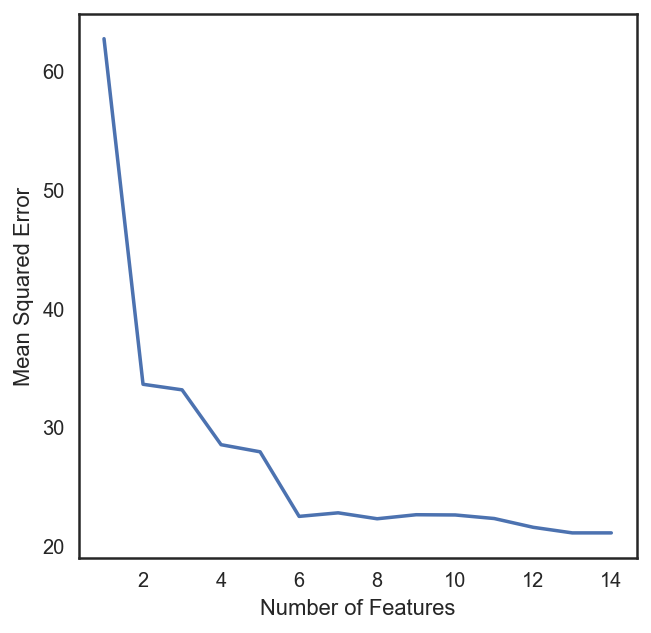

In [125]:
from sklearn.feature_selection import RFE
error_array = []
for num_features in range(1,15):
    selector = RFE(estimator = lr, n_features_to_select= num_features, step = 1, verbose=0)
    selector.fit(X_train, y_train)

    my_features = boston_df[boston_df.columns[selector.support_]].columns
    
    
    y_pred = selector.predict(X_test) 
    error = round(mean_squared_error(y_test, y_pred),2)
    
    print len(my_features), "% error", error, ":", my_features
    
    error_array.append(error)
plt.plot(range(1,15), error_array)
plt.ylabel("Mean Squared Error")
plt.xlabel("Number of Features")

d) Conclude the optimal number of features for this task. Think about the cost of adding for data vs the benefit of a more accurate prediction. Explain your answer.

In [ ]:
# optimal number of features for this task is the one with the least amount of error, but we can use a more balance since the errorloss is minimal and use 12 features

# Question 4

Perform a cross-validation of the linear regression on the train set with K=5. Print the CV scores for each repeat.

In [106]:
X_train.shape[0]

354

In [127]:
from sklearn.cross_validation import cross_val_score
scoring = abs(cross_val_score(lr, X_train, y_train, scoring="mean_squared_error",  cv = 5))
print scoring
#kf = KFold(n = X_train.shape[0],n_folds = 5, shuffle = True)


[ 13.4290845   20.28629291  50.06824401  18.99186729  28.79861024]


/Users/Stav/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Stav/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Stav/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Stav/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

# Question 5: Bonus 

Submit predictions on the following Kaggle competition: https://www.kaggle.com/c/otto-group-product-classification-challenge

To do so, you may try other sets of feature selection techniques.
Here are some useful ones:
    - sklearn.feature_selection.SelectFromModel
    - https://github.com/jundongl/scikit-feature
    - https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/